In [10]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

ride_data.head()
city_data.head()
# Combine the data into a single dataset
comb_data = pd.merge(city_data,ride_data, on = 'city')

# Display the data table for preview
comb_data.head()


,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

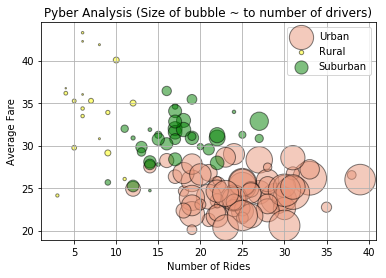

In [11]:
# Obtain the x and y coordinates for each of the three city types
rural_df = comb_data[comb_data['type'] == 'Rural']
urban_df = comb_data[comb_data['type'] == 'Urban']
suburban_df = comb_data[comb_data['type'] == 'Suburban']

groupedrural_df = comb_data[comb_data['type'] == 'Rural'].groupby(['city']).agg({'ride_id' : 'count', 'driver_count': 'sum','fare' : 'mean'})
groupedurban_df = comb_data[comb_data['type'] == 'Urban'].groupby(['city']).agg({'ride_id' : 'count', 'driver_count': 'sum','fare' : 'mean'})
groupedsuburban_df = comb_data[comb_data['type'] == 'Suburban'].groupby(['city']).agg({'ride_id' : 'count', 'driver_count': 'sum','fare' : 'mean'})

groupedurban_df.head()

# Build the scatter plots for each city types

ax1 = groupedurban_df.plot.scatter(x = 'ride_id', y = 'fare' 
           ,edgecolors = 'k', c = 'darksalmon', s = groupedurban_df['driver_count']*.5, alpha = .5, label = 'Urban')

ax2 = groupedrural_df.plot.scatter(x = 'ride_id', y = 'fare' 
           ,edgecolors = 'k', c = 'yellow', s = groupedrural_df['driver_count']*.5, alpha = .5, ax = ax1, label = 'Rural')

ax3 = groupedsuburban_df.plot.scatter(x = 'ride_id', y = 'fare' 
           ,edgecolors = 'k', c = 'green', s = groupedsuburban_df['driver_count']*.5, alpha = .5, ax = ax1, label = 'Suburban')

plt.legend(numpoints = 4)
plt.title('Pyber Analysis (Size of bubble ~ to number of drivers)')
plt.xlabel('Number of Rides')
plt.ylabel('Average Fare')
plt.grid()
#plt.scatter(groupedsuburban_df['ride_id'], groupedsuburban_df['fare'] ,s=groupedsuburban_df['driver_count']*.5,  c='g', alpha=0.5)
#plt.scatter(groupedrural_df['ride_id'], groupedrural_df['fare'] ,s=groupedrural_df['driver_count']*.5,  c='b', alpha=0.5)
#plt.scatter(groupedurban_df['ride_id'], groupedurban_df['fare'] , s=groupedurban_df['driver_count']*.5, c='y', alpha=0.5)
#plt.show()
#plt.title('Pyber Fares')


# Incorporate the other graph properties

# Create a legend

# Incorporate a text label regarding circle size

# Save Figure


In [3]:
# Show plot
plt.show()

## Total Fares by City Type

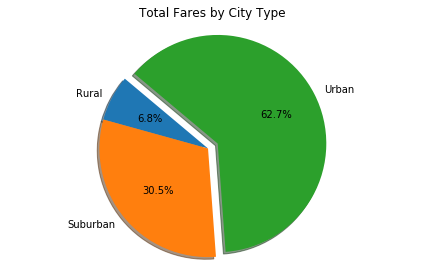

In [21]:
# Calculate Type Percents
fares_by_city = comb_data.groupby('type').agg({'fare' : 'sum'})
fares_by_city['City_Type'] = fares_by_city.index

fares_by_city = fares_by_city.rename(columns={'type':'type', 'fare' : 'Total_Fares'})


# Build Pie Chart
explode = (0, 0, 0.1)

plt.pie(fares_by_city['Total_Fares'], explode = explode, labels=fares_by_city['City_Type'], 
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis('equal')
plt.title('Total Fares by City Type')

# Save Figure
plt.tight_layout()
plt.savefig("../TotalFaresByCityType.png")
plt.show()

In [5]:
# Show Figure
plt.show()

## Total Rides by City Type

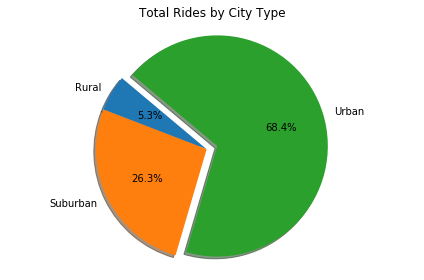

In [22]:
# Calculate Type Percents
rides_by_city = comb_data.groupby('type').agg({'ride_id' : 'count'})
rides_by_city['City_Type'] = rides_by_city.index

rides_by_city = rides_by_city.rename(columns={'type':'type', 'ride_id' : 'Total_Rides'})


# Build Pie Chart
explode = (0, 0, 0.1)

plt.pie(rides_by_city['Total_Rides'], explode = explode, labels=rides_by_city['City_Type'], 
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis('equal')
plt.title('Total Rides by City Type')

# Save Figure
plt.tight_layout()
plt.savefig("../TotalRidesByCityType.png")
plt.show()


In [24]:
# Show Figure
comb_data.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Total Drivers by City Type

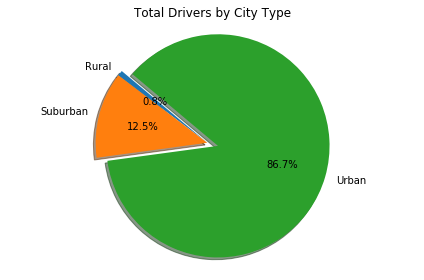

In [25]:
# Calculate Type Percents
drivers_by_city = comb_data.groupby('type').agg({'driver_count' : 'sum'})
drivers_by_city['City_Type'] = drivers_by_city.index

drivers_by_city = drivers_by_city.rename(columns={'type':'type', 'driver_count' : 'Total_Drivers'})


# Build Pie Chart
explode = (0, 0, 0.1)

plt.pie(drivers_by_city['Total_Drivers'], explode = explode, labels=drivers_by_city['City_Type'], 
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis('equal')
plt.title('Total Drivers by City Type')

# Save Figure
plt.tight_layout()
plt.savefig("../TotalDriversByCityType.png")
plt.show()

In [9]:
# Show Figure
plt.show()